In [69]:
#There isnt enough data in the dataset
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

wine = pd.read_excel(r"C:\Users\djbro\OneDrive\Desktop\Website Topics\Multiple Linear Regression\Multiple Linear Regression\Wine\Wine1.xlsx")
wine1 = pd.read_excel(r"C:\Users\djbro\OneDrive\Desktop\Website Topics\Multiple Linear Regression\Multiple Linear Regression\Wine\Wine2.xlsx")


In [70]:
#Concatenate wine and wine1
a=[wine,wine1]
wine = pd.concat(a)
wine


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005


In [71]:
import seaborn as sns
#sns.pairplot(wine)

In [72]:
# Checking for null values
print(wine.info())

# Checking for outliers
print(wine.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         27 non-null     int64  
 1   Price        27 non-null     float64
 2   WinterRain   27 non-null     int64  
 3   AGST         27 non-null     float64
 4   HarvestRain  27 non-null     int64  
 5   Age          27 non-null     int64  
 6   FrancePop    27 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.7 KB
None
              Year      Price  WinterRain       AGST  HarvestRain        Age  \
count    27.000000  27.000000   27.000000  27.000000    27.000000  27.000000   
mean   1966.814815   7.041948  608.407407  16.477781   144.814815  16.185185   
std       8.246384   0.634590  129.034956   0.659189    73.065849   8.246384   
min    1952.000000   6.204900  376.000000  14.983300    38.000000   3.000000   
25%    1960.500000   6.508350  543.500000  16.150000    88.000000

In [73]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(wine, train_size = 0.6, test_size = 0.4, random_state = 0)

In [74]:
#Re-scaling the Features
#We can see that all the columns have 
#smaller integer values in the dataset 
#except the area column. So it is important to
#re-scale the variables so that they all have a comparable scale. 
#If we don’t have relative scales, then some of the regression model 
#coefficients will be of different units compared to the other coefficients.

#To do that, we use the MinMax scaling method.

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Year','Price','WinterRain','AGST','HarvestRain','Age','FrancePop']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1,1.000000,0.107025,0.444934,0.219316,0.142857,0.000000,1.000000
8,0.333333,0.505280,0.707048,0.377211,0.055556,0.666667,0.395485
24,0.925926,0.414899,0.852423,0.122842,0.051587,0.074074,0.956261
23,0.888889,0.000000,0.980176,0.000000,0.194444,0.111111,0.936990
6,0.259259,0.116376,0.852423,0.438632,1.000000,0.740741,0.265941
4,0.185185,0.231991,0.453744,0.438632,0.591270,0.814815,0.185858
2,0.074074,0.638523,0.277533,0.824579,0.365079,0.925926,0.062231
16,0.629630,0.594899,0.541850,0.570211,0.202381,0.370370,0.725201
7,0.296296,1.000000,1.000000,0.921053,0.000000,0.703704,0.312777
5,0.222222,0.812975,0.240088,1.000000,0.591270,0.777778,0.226738


In [76]:
# Dividing the training data set into X and Y
y_train = df_train.pop('Price')
X_train = df_train

In [77]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000141
Time:                        01:01:19   Log-Likelihood:                 14.793
No. Observations:                  16   AIC:                            -17.59
Df Residuals:                      10   BIC:                            -12.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.744e+12   9.71e+12     -0.488      0.636   -2.64e+13    1.69e+13
Year         4.744e+12   9.71e+12      0.488      0.636   -1.69e+13    2.64e+13
WinterRain      0.3721      0.148      2.515      0.031       0.043       0.702
AGST            0.8103      0.177      4.574      0.001       0.416       1.205
HarvestRain    -0.5643      0.154     -3.664      0.004      -0.907      -0.221
Age          4.744e+12   9.71e+12      0.488      0.636   -1.69e+13    2.64e+13
FrancePop      -1.1548      0.839     -1.376      0.199      -3.025       0.715
==============================================================================
Omnibus:                        1.133   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                0.854
Skew:                           0.266   Prob(JB):                        0.652
Kurtosis:                       2.001   Cond. No.                     8.77e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
#Recursive Feature Elimination (RFE)
#RFE is an automatic process where we don’t need to select 
#variables manually. We follow the same steps we have done earlier 
#until Re-scaling the features and dividing the data into X and Y.

#We will use the LinearRegression function from sklearn 
#for RFE (which is a utility from sklearn)

In [79]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('WinterRain', True, 1),
 ('AGST', True, 1),
 ('HarvestRain', True, 1),
 ('Age', True, 1),
 ('FrancePop', True, 1)]

In [81]:
# Creating X_test dataframe with RFE selected variables
col = ['Year','WinterRain','AGST','HarvestRain','Age','FrancePop']
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000141
Time:                        01:01:19   Log-Likelihood:                 14.793
No. Observations:                  16   AIC:                            -17.59
Df Residuals:                      10   BIC:                            -12.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.744e+12   9.71e+12     -0.488      

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [82]:
X_train_new = X_train_rfe.drop(["Year"], axis = 1)
#X_train_new = X_train_rfe
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     16.24
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000161
Time:                        01:01:19   Log-Likelihood:                 14.576
No. Observations:                  16   AIC:                            -17.15
Df Residuals:                      10   BIC:                            -12.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1936      0.903      1.322      

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [83]:
X_train_new = X_train_new.drop(["WinterRain"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     12.88
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000391
Time:                        01:01:19   Log-Likelihood:                 10.793
No. Observations:                  16   AIC:                            -11.59
Df Residuals:                      11   BIC:                            -7.723
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0168      1.013      1.991      

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [84]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      Features         VIF
0        const  743.231192
1         AGST    1.782506
2  HarvestRain    1.078752
3          Age   82.095920
4    FrancePop   77.692197


In [85]:
X_train_new = X_train_new.drop(["FrancePop"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     13.42
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000385
Time:                        01:01:20   Log-Likelihood:                 8.6605
No. Observations:                  16   AIC:                            -9.321
Df Residuals:                      12   BIC:                            -6.231
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1664      0.095      1.759      

In [86]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      Features       VIF
0        const  5.419143
1         AGST  1.658351
2  HarvestRain  1.077040
3          Age  1.756959


In [87]:
X_train_new = X_train_new.drop(["const"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     13.42
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000385
Time:                        01:01:20   Log-Likelihood:                 8.6605
No. Observations:                  16   AIC:                            -9.321
Df Residuals:                      12   BIC:                            -6.231
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1664      0.095      1.759      

C:\Users\djbro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [88]:
#Since the p-values and VIF are in the desired range, we’ll move forward with the analysis.

In [89]:
#The next step is the residual analysis of error terms.

#Residual Analysis
#So, let’s check if the error terms are also normally distributed using a histogram.

<AxesSubplot:ylabel='Count'>

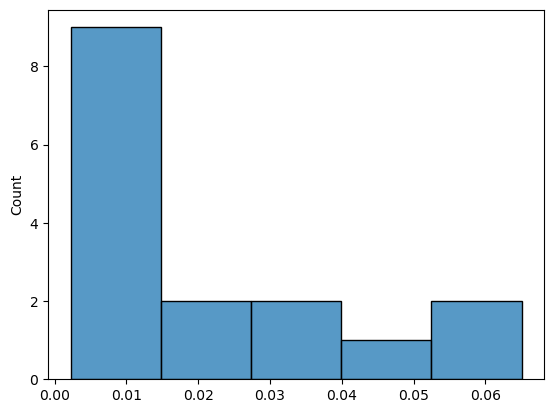

In [90]:
y_train_price = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price)**2, bins = 5)

In [91]:
num_vars = ['Year','Price','WinterRain','AGST','HarvestRain','Age','FrancePop']
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('Price')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [92]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.6505934892761136

In [93]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.12075339222564022
0.01926930931156257
0.13881393774244202


In [94]:
#The R² value for the test data = 0.6481740917926483, 
#which is pretty similar to the train data.

#Since the R² values for both the train and 
#test data are almost equal, the model we built is the best-fitted model.